# ObsID : 0945060133, SRCNUM : 5, Instru : EMOS1
Not on Simbad.

## ESASky
EPIC Stack's pointer is not on the source location from XMM-Archive link. The closest pointer are far from the source (https://sky.esa.int/esasky/?target=53.59479166666666%20-28.90244444444444&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr).

``GAIA``

- Designation : Gaia DR3 5057101614813827200
- RA : 53.5942754°
- DEC : -28.9023933°
- Parallax : 2.941 mas
- G : 19.6951

``2MASS``

- Name : 03342264-2854082
- RA : 53.5943410°
- DEC : -28.9022880°

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected C-statistic value of a perfect fit is : **C-statistic ≈ 70 ± 12**. So between 58 and 82 approximately.

## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945060133_SRCNUM5_EMOS1_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.845e-03 +/- 7.509e-04 (91.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-73
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 1.153e+04 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945060133_SRCNUM5_EMOS1_background_spectrum.fits
  Background Exposure Time: 1.153e+04 sec
 Using Response (RMF) File            ObsID0945060133_SRCNUM5_EMOS1.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945060133_SRCNUM5_EMOS1.arf



In [1]:
print(f"Number of counts = {5.845e-03*1.153e+04} cts")

Number of counts = 67.39285000000001 cts


The number of counts is lower than 100 cts, indicating that the C-statistic is a good fit statistic choice.

## Plot spectrum

In [4]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     3 channels (1-3) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



(-0.5, 857.5, 662.5, -0.5)

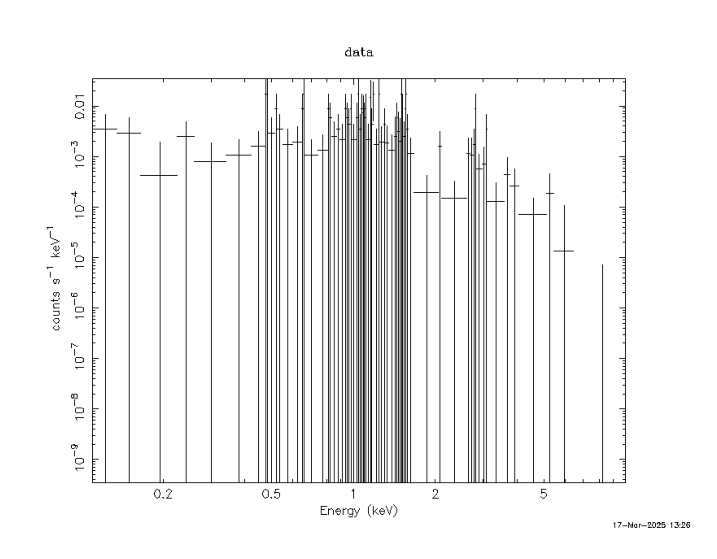

In [5]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
The C-statistic value of **211.1244** falls outside the range [58–82], indicating a bad fit.

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              9.656686e+06     using 70 bins.

Te

(-0.5, 856.5, 661.5, -0.5)

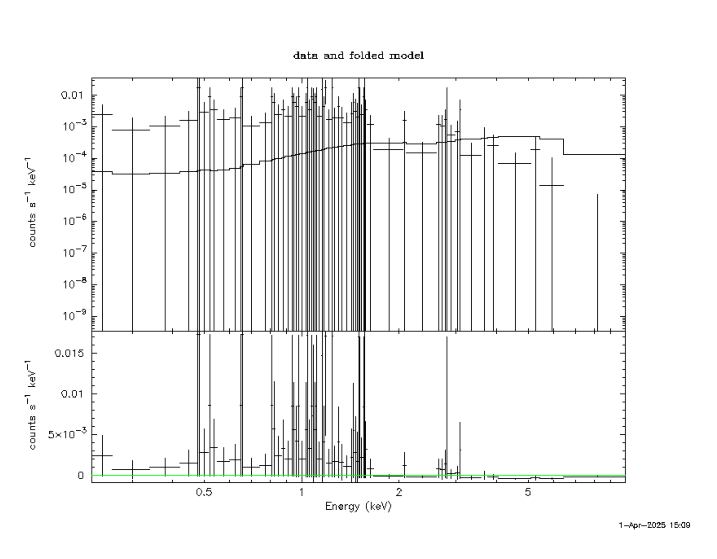

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
The C-statistic value of **56.1161** falls just below the range [58–82], indicating a good fit.

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.269757e+06     using 70 bins.

Test statistic : Chi-Squared              8.819579e+10     using 70 bins.
 Null hypothesis probability of 0.000000e+00 with 67 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
2.01825e+06  421165       -3     0.0457195       2.29065      0.469908
1247.13      1.22944e+06  -4       60.2653       197.649     0.0177102
923.754      9997         -5       13.7326       53.4477    0.00187044


(-0.5, 854.5, 660.5, -0.5)

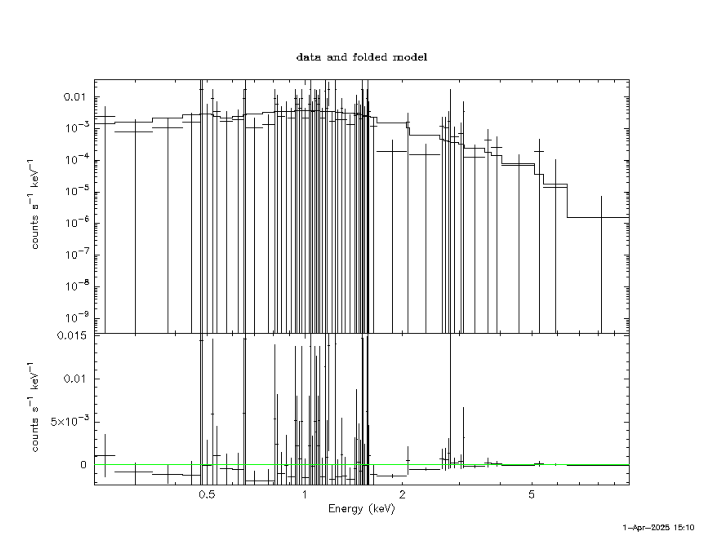

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
The C-statistic value of **53.6511** falls just below the range [58–82], indicating a good fit.

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                833071.7     using 70 bins.

Test statistic : Chi-Squared              8.762249e+09     using 70 bins.
 Null hypothesis probability of 0.000000e+00 with 67 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
364305       241862       -3      0.249976       44.1264     

(-0.5, 856.5, 650.5, -0.5)

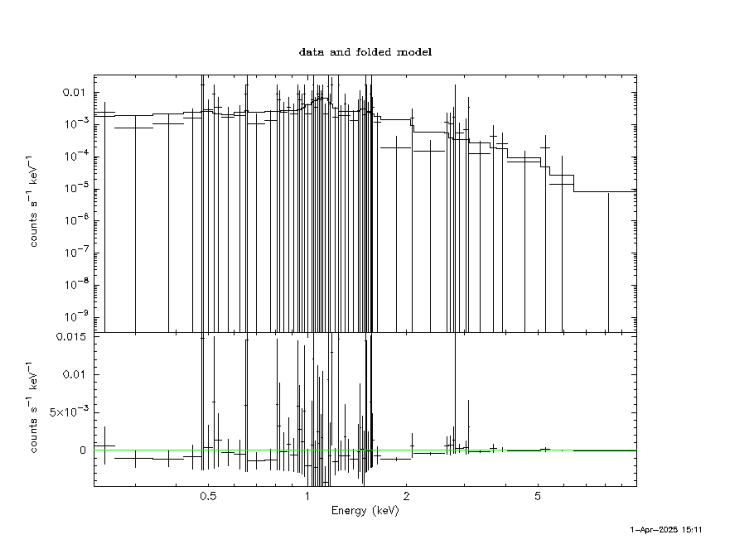

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
The C-statistic value of **243.8870** falls outside the range [58–82], indicating a bad fit.

In [11]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              5.534912e+06     using 70 bins.

Test statistic : Chi-Squared              5.492601e+11     using 70 bins.
 Null hypothesis probability of 0.000000e+00 with 67 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
1.50744e+06  1.40168e+06  -2      0.297296       6.16249      0.363255
243.887      1.76913e+06  -3       6481.59       9.06149       2816.96
243.887      1.76352e-25  -4       1792.86       9.41210       331.91

(-0.5, 856.5, 659.5, -0.5)

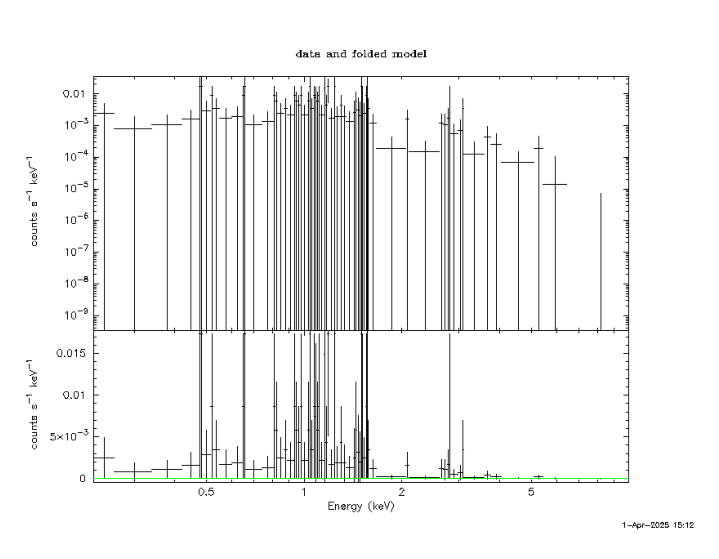

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** (GAIA)

- RA = 53.5942754°
- Dec = -28.9023933°

53.59 -28.90

**Column density :** nH = 3*10^20 cm^-2

In [16]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss (Second best fit)"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec (Best fit)"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 84419.95501620299

bremss (Second best fit)
(tbabs) : 6.953729262051616e+20

apec (Best fit)
(tbabs) : 1.6706988365297202e+20

powerlaw
(tbabs) : 1.7928565150009216e+25


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Apec`` with C-statistic = 53.6511 using 70 bins: **8.443e-14 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Bemss`` with C-statistic = 56.1161 using 70 bins: **7.5054e-14 ergs/cm^2/s**.

In [2]:
Flux_apec = 8.443e-14 # ergs/cm^2/s
Flux_bremss = 7.5054e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Apec : F_x-ray = {Flux_apec} ergs/cm^2/s")
print(f"Bremss : F_x-ray = {Flux_bremss} ergs/cm^2/s")

X-ray flux : 
Apec : F_x-ray = 8.443e-14 ergs/cm^2/s
Bremss : F_x-ray = 7.5054e-14 ergs/cm^2/s


### Optical flux

In [4]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 19.6951

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.390430542671063e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [5]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Apec : F_x-ray/F_optical = {Flux_apec/F}")
print(f"Bremss : F_x-ray/F_optical = {Flux_bremss/F}")

X-ray Flux / Optical Flux ratio : 
Apec : F_x-ray/F_optical = 0.6072219892250581
Bremss : F_x-ray/F_optical = 0.5397896385087945


## Luminosity

In [7]:
"""GAIA"""

P_mas = 2.941 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_apec = 4*np.pi*Flux_apec*(d_cm)**2 # erg/s
Luminosity_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Apec : L_x-ray = {Luminosity_apec} erg/s")
print(f"Bremss : L_x-ray = {Luminosity_bremss} erg/s")

(GAIA)
Distance : d = 1.0492009520571234e+21 cm
Luminosity :
Apec : L_x-ray = 1.1679493392245395e+30 erg/s
Bremss : L_x-ray = 1.03824789418641e+30 erg/s
